Training model for East
Mean Squared Error: 0.0003169001227780424
R^2 Score: 0.7856288989005737


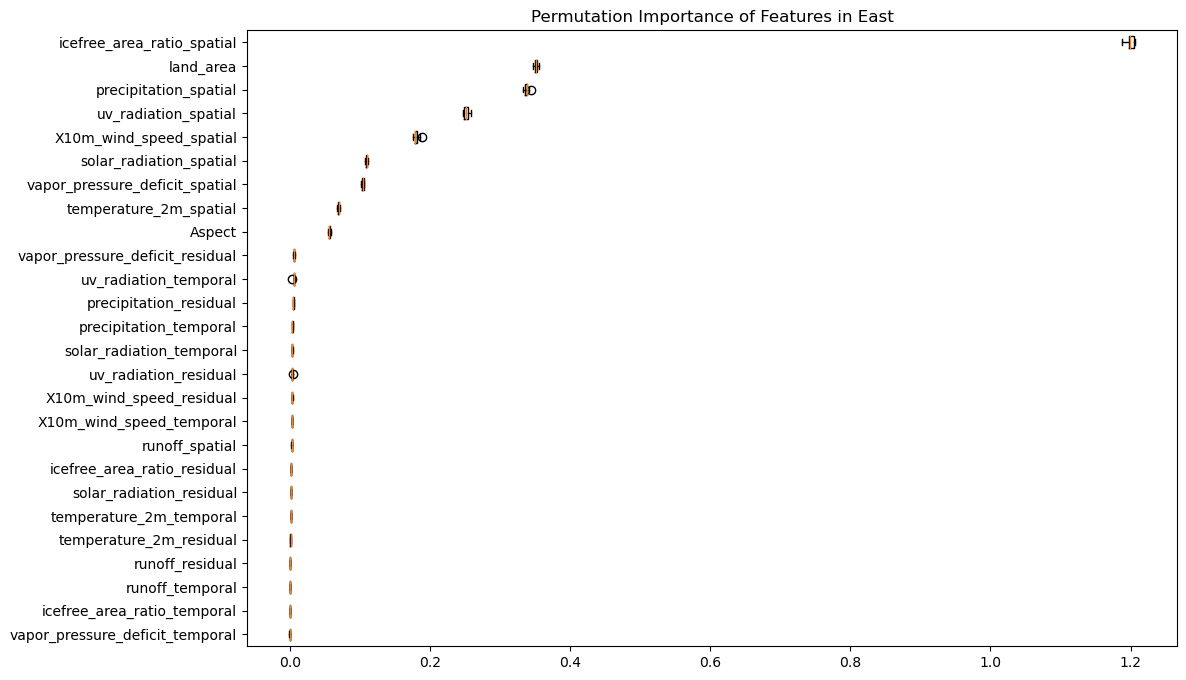

Training model for Peninsula
Mean Squared Error: 5.63875335165754e-05
R^2 Score: 0.7173283876622618


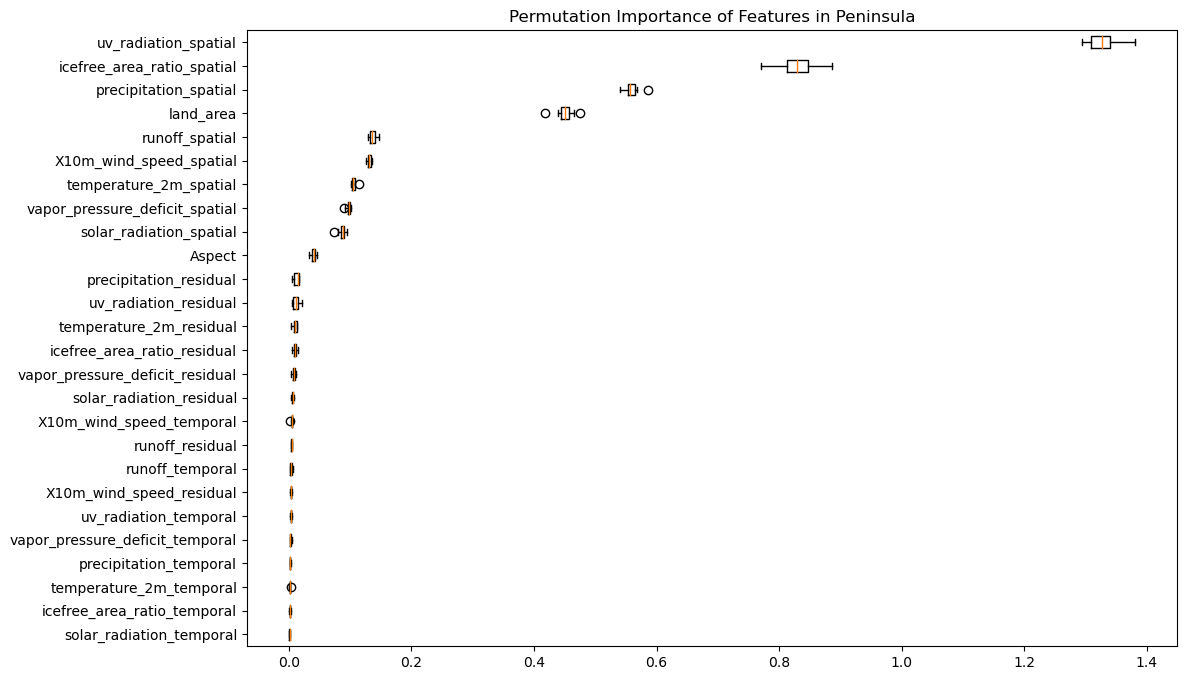

Training model for West
Mean Squared Error: 6.950250442953747e-05
R^2 Score: 0.7149248289806706


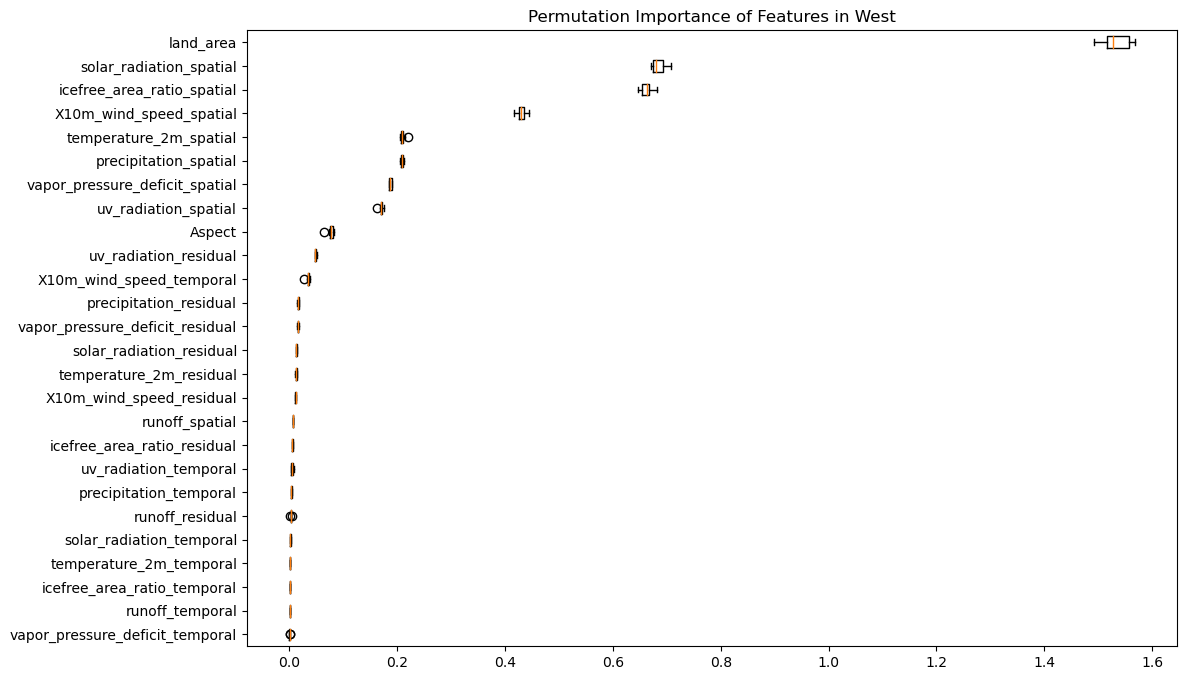

Results for East:
MSE: 0.0003169001227780424
R^2 Score: 0.7856288989005737
Permutation Importance:
[ 3.51202390e-01  5.64199260e-02  6.97421152e-02  2.52323212e-01
  1.19961470e+00  1.09678436e-01  2.64830426e-03  1.80849187e-01
  3.38043738e-01  1.04393991e-01  1.46024178e-03  6.02570771e-03
  4.27226541e-04  3.65864350e-03  4.64370087e-04  3.15387463e-03
  3.75201124e-03 -1.64408753e-04  1.33145130e-03  3.47161621e-03
  2.13359880e-03  2.02860195e-03  5.06230779e-04  3.27249392e-03
  5.27944452e-03  6.14309669e-03]

Results for Peninsula:
MSE: 5.63875335165754e-05
R^2 Score: 0.7173283876622618
Permutation Importance:
[4.50086589e-01 4.01302379e-02 1.05372042e-01 1.32851231e+00
 8.30982850e-01 8.70533335e-02 1.36811190e-01 1.31491010e-01
 5.59364413e-01 9.74368531e-02 1.93421677e-03 3.19112812e-03
 1.77408512e-03 1.17362594e-03 4.03279769e-03 4.46152717e-03
 2.07698311e-03 2.48694226e-03 9.84848529e-03 1.17944800e-02
 9.70650812e-03 5.94407494e-03 4.33655873e-03 3.50929857e-03
 1.2319

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv')

# Define the columns to drop that are not used for the model
columns_to_drop = ['Num', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude','volumetric_soil_water_spatial','volumetric_soil_water_temporal','volumetric_soil_water_residual']
X = df.drop(['vegetation_area_ratio', 'land_area',], axis=1)

# Get unique regions
regions = df['Regions'].unique()

results = {}  # Dictionary to store results for each region

for region in regions:
    print(f"Training model for {region}")
    
    # Filter data for the current region
    region_df = df[df['Regions'] == region]
    
    # Drop unnecessary columns
    region_df = region_df.drop(columns_to_drop, axis=1)
    
    # Separate features and target
    X = region_df.drop('vegetation_area_ratio', axis=1)
    y = region_df['vegetation_area_ratio']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train a Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    
    # Calculate permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
    
    # Organizing the results
    sorted_idx = perm_importance.importances_mean.argsort()
    plt.figure(figsize=(12, 8))
    plt.boxplot(perm_importance.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
    plt.title(f"Permutation Importance of Features in {region}")
    plt.show()
    


    
    # Store results in the dictionary
    results[region] = {
        'MSE': mse,
        'R2': r2,
        'Permutation Importance': perm_importance.importances_mean
    }

# Optional: Print all results at the end
for region, metrics in results.items():
    print(f"Results for {region}:\nMSE: {metrics['MSE']}\nR^2 Score: {metrics['R2']}\nPermutation Importance:\n{metrics['Permutation Importance']}\n")

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df_solar_Peninsula.csv')

# Drop unnecessary columns
columns_to_drop = ['Num', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude','volumetric_soil_water_spatial','volumetric_soil_water_temporal','volumetric_soil_water_residual']

# Separate features and target
X = df.drop('vegetation_area_ratio', axis=1)
y = df['vegetation_area_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Start to train the model")
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Start to train the model
Mean Squared Error: 7.517755090279859e-05
R^2 Score: 0.7251893306277493


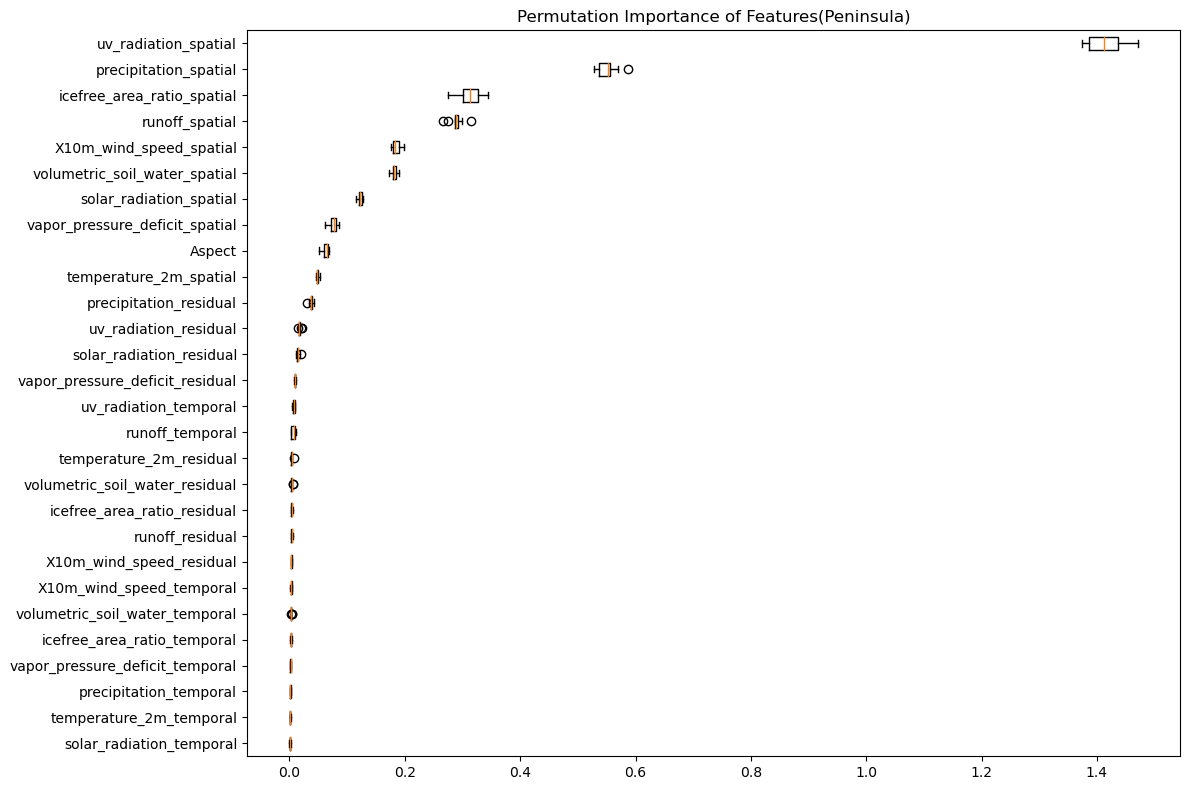

In [6]:
# Organizing the results
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance of Features(Peninsula)")
plt.tight_layout()
plt.show()

Start to train the model
Mean Squared Error: 0.0004564554848498244
R^2 Score: 0.7848063927820986
icefree_area_ratio_spatial         0.338790
uv_radiation_spatial               0.086794
precipitation_spatial              0.082542
X10m_wind_speed_spatial            0.069961
temperature_2m_spatial             0.050175
solar_radiation_spatial            0.049712
vapor_pressure_deficit_spatial     0.045917
Aspect                             0.042101
volumetric_soil_water_spatial      0.038733
volumetric_soil_water_residual     0.021215
icefree_area_ratio_residual        0.018861
X10m_wind_speed_residual           0.016838
vapor_pressure_deficit_residual    0.016542
solar_radiation_residual           0.015705
temperature_2m_residual            0.015278
precipitation_residual             0.013878
uv_radiation_residual              0.012768
volumetric_soil_water_temporal     0.011674
icefree_area_ratio_temporal        0.007587
uv_radiation_temporal              0.007467
temperature_2m_temporal

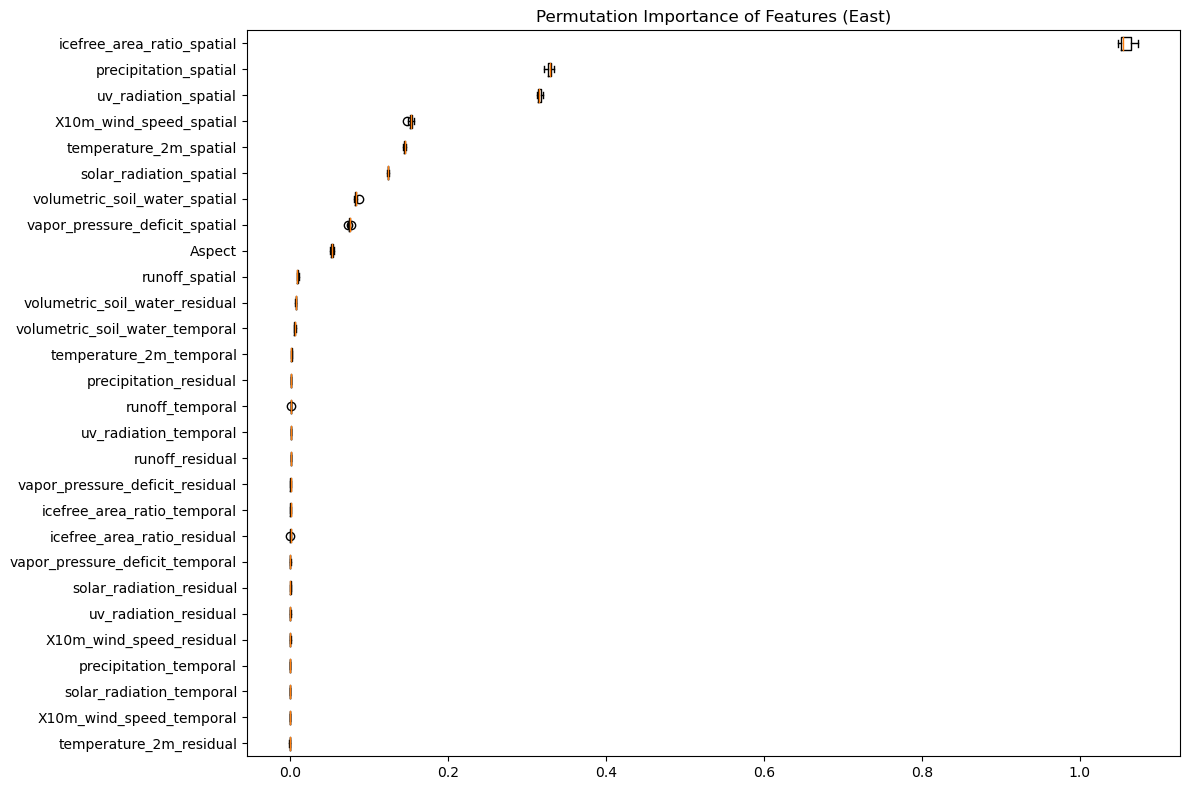

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df_solar_East.csv')

# Drop unnecessary columns
df.drop(['Num', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude'], axis=1, inplace=True)

# Separate features and target
X = df.drop('vegetation_area_ratio', axis=1)
y = df['vegetation_area_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Start to train the model")
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Optional: Feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

# Organizing the results
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance of Features (East)")
plt.tight_layout()
plt.show()

Start to train the model
Mean Squared Error: 0.00020214147476063966
R^2 Score: 0.7113156300783643
volumetric_soil_water_spatial      0.175879
icefree_area_ratio_spatial         0.166169
solar_radiation_spatial            0.084101
temperature_2m_spatial             0.071488
X10m_wind_speed_spatial            0.065347
Aspect                             0.053647
vapor_pressure_deficit_spatial     0.052172
precipitation_spatial              0.043100
uv_radiation_spatial               0.034421
volumetric_soil_water_residual     0.032869
icefree_area_ratio_residual        0.027641
solar_radiation_residual           0.022853
X10m_wind_speed_residual           0.022353
vapor_pressure_deficit_residual    0.022142
uv_radiation_residual              0.022089
temperature_2m_residual            0.021380
precipitation_residual             0.016020
volumetric_soil_water_temporal     0.010410
uv_radiation_temporal              0.009111
X10m_wind_speed_temporal           0.007661
temperature_2m_tempora

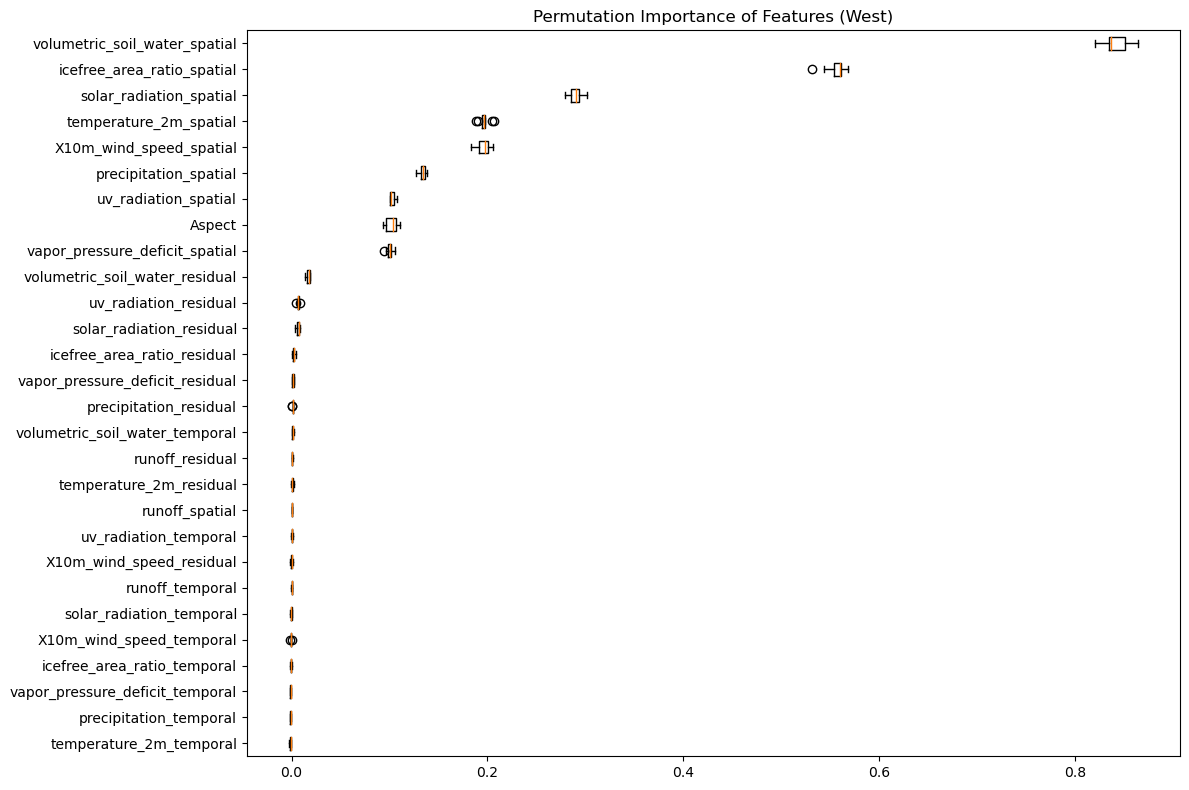

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df_solar_West.csv')

# Drop unnecessary columns
df.drop(['Num', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude'], axis=1, inplace=True)

# Separate features and target
X = df.drop('vegetation_area_ratio', axis=1)
y = df['vegetation_area_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Start to train the model")
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Optional: Feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

# Organizing the results
perm_sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importance of Features (West)")
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# === Load and prepare the data ===
df = pd.read_csv(r'G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df_duration.csv')

# 假设你已经加载好 df
df_region = df[df['Regions'] == 'East'].copy()

# 删除指定列
df_region.drop(['Num', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude'], axis=1, inplace=True)

# 打印剩下的变量
print("剩余变量列如下：")
print(df_region.columns.tolist())


剩余变量列如下：
['vegetation_area_ratio', 'vegetation_duration', 'Aspect', 'temperature_2m_spatial', 'uv_radiation_spatial', 'solar_radiation_spatial', 'icefree_area_ratio_spatial', 'volumetric_soil_water_spatial', 'runoff_spatial', 'X10m_wind_speed_spatial', 'precipitation_spatial', 'vapor_pressure_deficit_spatial', 'temperature_2m_temporal', 'uv_radiation_temporal', 'solar_radiation_temporal', 'icefree_area_ratio_temporal', 'volumetric_soil_water_temporal', 'runoff_temporal', 'X10m_wind_speed_temporal', 'precipitation_temporal', 'vapor_pressure_deficit_temporal', 'temperature_2m_residual', 'uv_radiation_residual', 'solar_radiation_residual', 'icefree_area_ratio_residual', 'volumetric_soil_water_residual', 'runoff_residual', 'X10m_wind_speed_residual', 'precipitation_residual', 'vapor_pressure_deficit_residual']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import os

# === Load the data ===
df = pd.read_csv(r"G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data\decomp_df.csv")

# === Define results containers ===
all_predictions = []
metrics = []

# === Define region list ===
regions = ['West', 'East', 'Peninsula']

# === Loop over each region ===
for region in regions:
    df_region = df[df['Regions'] == region].copy()

    # Drop non-feature columns
    df_region.drop(['Num', 'Regions', 'Subregions', 'pixel', 'year', 'latitude', 'longitude'], axis=1, inplace=True)

    # Shared features (X)
    features = df_region.drop([
        'vegetation_duration', 'vegetation_area_ratio',
    ], axis=1)

    # === Duration model ===
    X_dur = features.copy()
    y_dur = df_region['vegetation_duration']
    X_train_dur, X_test_dur, y_train_dur, y_test_dur = train_test_split(X_dur, y_dur, test_size=0.2, random_state=42)

    model_dur = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model_dur.fit(X_train_dur, y_train_dur)
    y_pred_dur = model_dur.predict(X_test_dur)

    # Save predictions
    pred_df_dur = pd.DataFrame({
        'Region': region,
        'Type': 'Duration',
        'Actual': y_test_dur.values,
        'Predicted': y_pred_dur
    })
    all_predictions.append(pred_df_dur)

    # Save metrics
    mse_dur = mean_squared_error(y_test_dur, y_pred_dur)
    rmse_dur = np.sqrt(mse_dur)
    r2_dur = r2_score(y_test_dur, y_pred_dur)
    metrics.append({'Region': region, 'Type': 'Duration', 'R2': r2_dur, 'RMSE': rmse_dur, 'MSE': mse_dur})

    # === Area Ratio model ===
    y_area = df_region['vegetation_area_ratio']
    X_train_area, X_test_area, y_train_area, y_test_area = train_test_split(features, y_area, test_size=0.2, random_state=42)

    model_area = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    model_area.fit(X_train_area, y_train_area)
    y_pred_area = model_area.predict(X_test_area)

    # Save predictions
    pred_df_area = pd.DataFrame({
        'Region': region,
        'Type': 'AreaRatio',
        'Actual': y_test_area.values,
        'Predicted': y_pred_area
    })
    all_predictions.append(pred_df_area)

    # Save metrics
    mse_area = mean_squared_error(y_test_area, y_pred_area)
    rmse_area = np.sqrt(mse_area)
    r2_area = r2_score(y_test_area, y_pred_area)
    metrics.append({'Region': region, 'Type': 'AreaRatio', 'R2': r2_area, 'RMSE': rmse_area, 'MSE': mse_area})

# === Save to CSV ===
all_predictions_df = pd.concat(all_predictions, ignore_index=True)
metrics_df = pd.DataFrame(metrics)

# === Output paths ===
output_folder = r"G:\Hangkai\Anttarctic Vegetation Dynamic\RF_trainning_data\cleared_data"
all_predictions_df.to_csv(os.path.join(output_folder, "RF_predictions_by_region.csv"), index=False)
metrics_df.to_csv(os.path.join(output_folder, "RF_metrics_by_region.csv"), index=False)

print("Finished training and saving results.")